In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import chainer
import chainer.functions as F
from chainer import Variable
import numpy as np
import sys
sys.path.append('src')
import importlib
import dataset
importlib.reload(dataset)

<module 'dataset' from 'src/dataset.py'>

In [67]:
train = dataset.PoseDataset('data/h3.6m', train=True)
train_iter = chainer.iterators.SerialIterator(train, batch_size=8, shuffle=False, repeat=False)
batch = train_iter.next()
batch = train_iter.next()
batch = chainer.dataset.concat_examples(batch)
xy, z = batch

xy = Variable(xy)
z_pred = Variable(z)
theta = np.random.uniform(0, 2 * np.pi, len(xy)).astype(np.float32)
cos_theta = Variable(np.broadcast_to(np.cos(theta), z_pred.shape[::-1]).transpose(3, 2, 1, 0))
sin_theta = Variable(np.broadcast_to(np.sin(theta), z_pred.shape[::-1]).transpose(3, 2, 1, 0))
x = xy[:, :, :, :17]
y = xy[:, :, :, 17:]
xy_fake = F.concat((x * cos_theta + z_pred * sin_theta, y), axis=3)

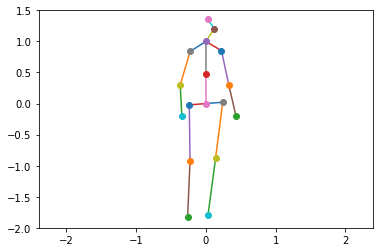

In [68]:
xs = xy.data[0, 0, 0, :17]
ys = xy.data[0, 0, 0, 17:]
# xs = xy_fake.data[0, 0, 0, :17]
# ys = xy_fake.data[0, 0, 0, 17:]
ps = np.array([0,1,2,0,4,5,0,7,8,9,8,11,12,8,14,15])
qs = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
for p, q in zip(ps, qs):
    plt.plot([xs[p], xs[q]], [ys[p], ys[q]])
for i in range(17):
    plt.plot([xs[i]], [ys[i]], 'o')
plt.xlim([-2.4, 2.4])
plt.ylim([-2.0, 1.5])
plt.show()